In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from tqdm import tqdm
import pickle

In [2]:
def get_set(x):                 
    x = x[1:-1].replace('"', '')
    x = x.replace("'", "")
    return set(x.split(','))

In [3]:
df1 = pd.read_csv('../data/string_locs2.csv')
df2 = pd.read_csv('../data/bioplex_locs.csv')

df1['locations'] = df1['locations'].apply(lambda x: get_set(x))
df2['locations'] = df2['locations'].apply(lambda x: get_set(x))

In [4]:
loc_count1 = dict()
for i in tqdm(df1.index):
    locs = list(df1['locations'][i])
    for loc in locs:
        loc = loc.strip() 
        try:
            loc_count1[loc] += 1
        except:
            loc_count1[loc] = 1
len(loc_count1)

100%|██████████| 3126817/3126817 [02:05<00:00, 24927.51it/s]


32

In [5]:
loc_count2 = dict()
for i in tqdm(df2.index):
    locs = list(df2['locations'][i])
    for loc in locs:
        loc = loc.strip() 
        try:
            loc_count2[loc] += 1
        except:
            loc_count2[loc] = 1
len(loc_count2)

100%|██████████| 73664/73664 [00:02<00:00, 33915.06it/s]


32

In [6]:
loc_count1 = {k: v for k, v in sorted(loc_count1.items(), key=lambda item: item[1], reverse=True)}
loc_count1

{'Nucleoplasm': 1448803,
 'Cytosol': 1075770,
 'Plasma membrane': 441486,
 'Vesicles': 425136,
 'Mitochondria': 248803,
 'Golgi apparatus': 207020,
 'Nucleoli': 189565,
 'Endoplasmic reticulum': 111274,
 'Nuclear bodies': 97269,
 'Nuclear speckles': 89349,
 'Cell Junctions': 72243,
 'Centrosome': 62702,
 'Nuclear membrane': 50659,
 'Microtubules': 49849,
 'Nucleoli fibrillar center': 48883,
 'Actin filaments': 45841,
 'Intermediate filaments': 37159,
 'Centriolar satellite': 30210,
 'Focal adhesion sites': 29389,
 'Cytokinetic bridge': 22779,
 'Cytoplasmic bodies': 13705,
 'Mitotic spindle': 12061,
 'Midbody': 9748,
 'Lipid droplets': 6222,
 'Lysosomes': 5226,
 'Rods & Rings': 5133,
 'Endosomes': 4961,
 'Midbody ring': 4207,
 'Peroxisomes': 3835,
 'Aggresome': 2691,
 'Microtubule ends': 1411,
 'Cleavage furrow': 470}

In [7]:
loc_count2 = {k: v for k, v in sorted(loc_count2.items(), key=lambda item: item[1], reverse=True)}
loc_count2

{'Nucleoplasm': 34544,
 'Cytosol': 24804,
 'Vesicles': 8348,
 'Plasma membrane': 7916,
 'Nucleoli': 6507,
 'Mitochondria': 5970,
 'Golgi apparatus': 4943,
 'Endoplasmic reticulum': 3152,
 'Nuclear bodies': 1880,
 'Nuclear speckles': 1852,
 'Centrosome': 1387,
 'Cell Junctions': 1341,
 'Nuclear membrane': 1064,
 'Nucleoli fibrillar center': 944,
 'Actin filaments': 906,
 'Microtubules': 901,
 'Intermediate filaments': 776,
 'Centriolar satellite': 572,
 'Cytokinetic bridge': 522,
 'Focal adhesion sites': 502,
 'Mitotic spindle': 228,
 'Cytoplasmic bodies': 209,
 'Midbody': 173,
 'Lysosomes': 167,
 'Endosomes': 163,
 'Lipid droplets': 116,
 'Peroxisomes': 100,
 'Rods & Rings': 89,
 'Midbody ring': 51,
 'Aggresome': 39,
 'Microtubule ends': 22,
 'Cleavage furrow': 6}

In [9]:
loc2idx = {k:v for v,k in enumerate(loc_count1.keys())}
loc2idx

{'Nucleoplasm': 0,
 'Cytosol': 1,
 'Plasma membrane': 2,
 'Vesicles': 3,
 'Mitochondria': 4,
 'Golgi apparatus': 5,
 'Nucleoli': 6,
 'Endoplasmic reticulum': 7,
 'Nuclear bodies': 8,
 'Nuclear speckles': 9,
 'Cell Junctions': 10,
 'Centrosome': 11,
 'Nuclear membrane': 12,
 'Microtubules': 13,
 'Nucleoli fibrillar center': 14,
 'Actin filaments': 15,
 'Intermediate filaments': 16,
 'Centriolar satellite': 17,
 'Focal adhesion sites': 18,
 'Cytokinetic bridge': 19,
 'Cytoplasmic bodies': 20,
 'Mitotic spindle': 21,
 'Midbody': 22,
 'Lipid droplets': 23,
 'Lysosomes': 24,
 'Rods & Rings': 25,
 'Endosomes': 26,
 'Midbody ring': 27,
 'Peroxisomes': 28,
 'Aggresome': 29,
 'Microtubule ends': 30,
 'Cleavage furrow': 31}

In [10]:
from collections import OrderedDict

locs1 = [loc2idx[x] for x in loc_count1.keys()]
locs2 = [loc2idx[x] for x in loc_count2.keys()]
values1 = loc_count1.values()
values2 = loc_count2.values()

loc_count1 = dict(zip(locs1, values1))
loc_count2 = dict(zip(locs2, values2))

loc_count1 = OrderedDict(sorted(loc_count1.items()))
loc_count2 = OrderedDict(sorted(loc_count2.items()))

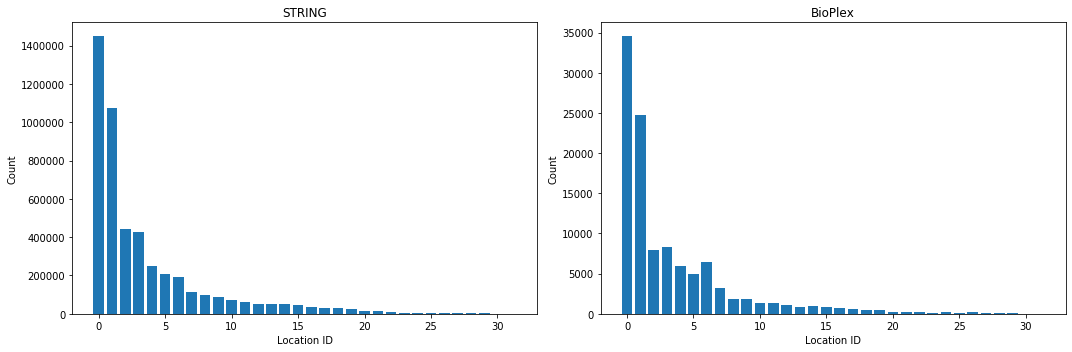

In [20]:
locs1 = loc_count1.keys()
values1 = loc_count1.values()
locs2 = loc_count2.keys()
values2 = loc_count2.values()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].bar(locs1,values1)
axes[0].set_title('STRING')
axes[1].bar(locs2,values2)
axes[1].set_title('BioPlex')

for ax in axes.flat:
    ax.set(xlabel='Location ID', ylabel='Count')

fig.tight_layout()
fig.savefig('../location_counts.png')
fig.show()

In [ ]:
# --------------------------------------------